**Problem Statement:** To understand how a bank approves and rejects a loan. With the help of EDA and basic understanding of risk analytics in business and financial services, we need to understand how data can be used to minimise the risk of losing money while lending to customers.

The two datasets 'application_data.csv' and 'previous_application.csv' are extracted, cleaned/modified and few columns are analyzed and visualised with the help of Python Libraries in order to draw the required inferences.

## 1. Import Libraries

In [132]:
import warnings

warnings.filterwarnings('ignore')

In [133]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 2. Loading the Data

## 3. Inspecting the Data Frame on the Application Data Set

In [134]:
# Checking the first 5 entries of the data set
NewApplications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AGE
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1,High,25
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0,VeryHigh,45
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0,VeryLow,52
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,0,Medium,52
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0,Medium,54


In [135]:
# Checking the number of rows and columns in the dataframe

NewApplications.shape

(307507, 83)

In [136]:
NewApplications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307507 non-null  int64   
 1   TARGET                        307507 non-null  int64   
 2   NAME_CONTRACT_TYPE            307507 non-null  object  
 3   CODE_GENDER                   307507 non-null  object  
 4   FLAG_OWN_CAR                  307507 non-null  object  
 5   FLAG_OWN_REALTY               307507 non-null  object  
 6   CNT_CHILDREN                  307507 non-null  int64   
 7   AMT_INCOME_TOTAL              307507 non-null  float64 
 8   AMT_CREDIT                    307507 non-null  float64 
 9   AMT_ANNUITY                   307495 non-null  float64 
 10  AMT_GOODS_PRICE               307229 non-null  float64 
 11  NAME_TYPE_SUITE               307507 non-null  object  
 12  NAME_INCOME_TYPE              

In [137]:
# Check the summary for the numeric columns
NewApplications.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,307507.000000,307507.00000,307507.000000,3.075070e+05,3.075070e+05,307495.000000,3.072290e+05,307507.000000,307507.000000,307507.000000,...,307507.000000,307507.000000,307507.000000,265988.000000,265988.000000,265988.000000,265988.000000,265988.000000,307507.000000,307507.000000
mean,278181.527256,0.08073,0.417047,1.687977e+05,5.990286e+05,27108.666786,5.383977e+05,0.020868,-16037.027271,63815.929208,...,0.000595,0.000507,0.000335,0.006403,0.007000,0.034362,0.267388,0.265474,1.643423,43.405223
std,102790.132982,0.27242,0.722119,2.371246e+05,4.024926e+05,14493.798379,3.694472e+05,0.013831,4363.982424,141276.472519,...,0.024388,0.022518,0.018299,0.083850,0.110758,0.204686,0.915994,0.794060,1.855809,11.945763
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,189146.500000,0.00000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,278203.000000,0.00000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
75%,367143.500000,0.00000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000
max,456255.000000,1.00000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000


In [138]:
#Checking the total number of null values in each columns
NewApplications.isnull().sum().sort_values(ascending = False).head(60)

FLOORSMAX_MEDI                  153019
YEARS_BEGINEXPLUATATION_AVG     150006
YEARS_BEGINEXPLUATATION_MODE    150006
YEARS_BEGINEXPLUATATION_MEDI    150006
TOTALAREA_MODE                  148430
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE               1
FLAG_PHONE                           0
FLAG_WORK_PHONE                      0
FLAG_EMAIL                           0
REGION_RATING_CLIENT_W_CITY          0
FLAG_EMP_PHONE                       0
OCCUPATION_TYPE          

## 4. PreviousApplication data check 

In [139]:
PreviousApplications.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Checking the number of rows and columns in the dataframe

PreviousApplications.shape

(1670214, 37)

In [143]:
PreviousApplications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [156]:
# Checking the summary for the numeric columns

PreviousApplications.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## 5. Data Cleaning

In [157]:
# List of Columns & NA counts where NA values are more than 50%
len(NewApplications.columns[NewApplications.isna().sum() < (len(NewApplications)/2)])
NewApplications = NewApplications[NewApplications.columns[NewApplications.isna().sum() < (len(NewApplications)/2)]]
NewApplications.shape
NewApplications.isna().sum().sort_values(ascending = False).head(30)

FLOORSMAX_MEDI                  153019
YEARS_BEGINEXPLUATATION_AVG     150006
YEARS_BEGINEXPLUATATION_MODE    150006
YEARS_BEGINEXPLUATATION_MEDI    150006
TOTALAREA_MODE                  148430
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE               1
FLAG_PHONE                           0
FLAG_WORK_PHONE                      0
FLAG_EMAIL                           0
REGION_RATING_CLIENT_W_CITY          0
FLAG_EMP_PHONE                       0
OCCUPATION_TYPE          

In [158]:
NewApplications['FLOORSMAX_AVG']

0         0.0833
1         0.2917
2         0.1667
3         0.1667
4         0.1667
           ...  
307506    0.6042
307507    0.0833
307508    0.1667
307509    0.0417
307510    0.3750
Name: FLOORSMAX_AVG, Length: 307507, dtype: float64

In [159]:
#Calculating the missing values
bank_missing = NewApplications.count()/len(NewApplications)
bank_missing

SK_ID_CURR                    1.000000
TARGET                        1.000000
NAME_CONTRACT_TYPE            1.000000
CODE_GENDER                   1.000000
FLAG_OWN_CAR                  1.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_MON     0.864982
AMT_REQ_CREDIT_BUREAU_QRT     0.864982
AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
INCOME_GROUP                  1.000000
AGE                           1.000000
Length: 83, dtype: float64

In [160]:
# Checking the % of null values for each column in new dataset

bank_missing = (1-bank_missing)*100
bank_missing

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_MON     13.501806
AMT_REQ_CREDIT_BUREAU_QRT     13.501806
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
INCOME_GROUP                   0.000000
AGE                            0.000000
Length: 83, dtype: float64

In [161]:
bank_missing.sort_values(ascending = False).head(25)

FLOORSMAX_MEDI                  49.761144
YEARS_BEGINEXPLUATATION_AVG     48.781329
YEARS_BEGINEXPLUATATION_MODE    48.781329
YEARS_BEGINEXPLUATATION_MEDI    48.781329
TOTALAREA_MODE                  48.268820
EXT_SOURCE_3                    19.825565
AMT_REQ_CREDIT_BUREAU_DAY       13.501806
AMT_REQ_CREDIT_BUREAU_HOUR      13.501806
AMT_REQ_CREDIT_BUREAU_QRT       13.501806
AMT_REQ_CREDIT_BUREAU_MON       13.501806
AMT_REQ_CREDIT_BUREAU_WEEK      13.501806
OBS_60_CNT_SOCIAL_CIRCLE         0.332025
DEF_30_CNT_SOCIAL_CIRCLE         0.332025
OBS_30_CNT_SOCIAL_CIRCLE         0.332025
DEF_60_CNT_SOCIAL_CIRCLE         0.332025
EXT_SOURCE_2                     0.214629
AMT_GOODS_PRICE                  0.090404
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
DAYS_LAST_PHONE_CHANGE           0.000325
FLAG_PHONE                       0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_EMAIL                       0.000000
REGION_RATING_CLIENT_W_CITY      0

### 5.1 Missing Value Treatment

In [162]:

NewApplications['FLOORSMAX_AVG'].mean()

0.1966345276699736

In [163]:
NewApplications['FLOORSMAX_AVG'].median()

0.1667

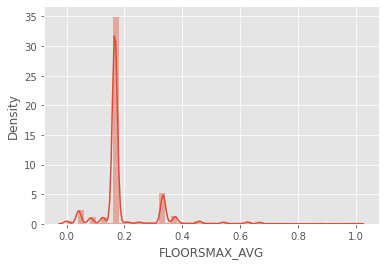

In [164]:
# finding the distribution
sns.distplot(NewApplications['FLOORSMAX_AVG'])

In [165]:
NewApplications['FLOORSMAX_AVG'].fillna(NewApplications['FLOORSMAX_AVG'].median(),inplace = True)

In [166]:
NewApplications['FLOORSMAX_AVG'].isna().sum()

0

In [167]:
NewApplications['FLOORSMAX_MODE']

0         0.0833
1         0.2917
2         0.1667
3         0.1667
4         0.1667
           ...  
307506    0.4583
307507    0.0833
307508    0.1667
307509    0.0417
307510    0.3750
Name: FLOORSMAX_MODE, Length: 307507, dtype: float64

In [168]:
NewApplications['FLOORSMAX_MODE'].describe()

count    307507.000000
mean          0.194642
std           0.105588
min           0.000000
25%           0.166700
50%           0.166700
75%           0.166700
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

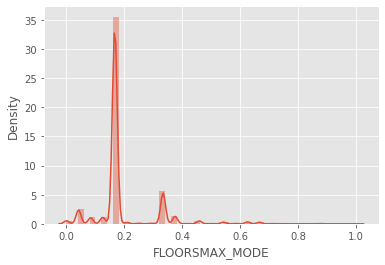

In [169]:
sns.distplot(NewApplications['FLOORSMAX_MODE'])

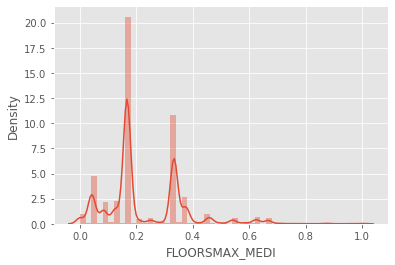

In [170]:
#Filling in the missing Values using the following rule:
#1. If Mean ~ Median, substitute by mean.

#2. If Mean != median, substitute by median.

NewApplications['FLOORSMAX_MODE'].fillna(NewApplications['FLOORSMAX_MODE'].median(),inplace = True)
sns.distplot(NewApplications['FLOORSMAX_MEDI'])

## 6. Best Metric To Impute Missing Values In Some Columns¶
#### 6.1 We can impute the missing values for the column 'OCCUPATION_TYPE' with mode, which is the value 'Laborers'

In [171]:
NewApplications['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5513
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [172]:
NewApplications['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

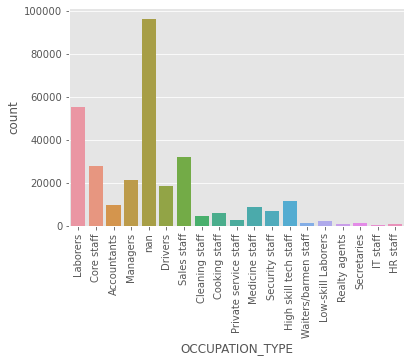

In [173]:
#Show the counts of observations in each categorical bin using bars.
sns.countplot(x='OCCUPATION_TYPE', data=NewApplications)
plt.xticks(rotation=90);

#### 6.2 EXT_SOURCE_2 imputation

In [174]:
NewApplications['EXT_SOURCE_3'].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.018137       1
0.017017       1
0.858178       1
0.018924       1
0.024057       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [175]:
NewApplications['EXT_SOURCE_3'].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

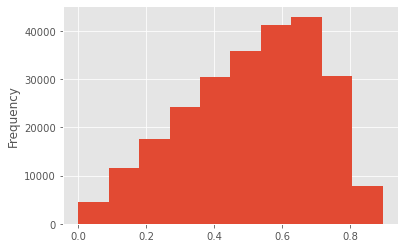

In [176]:
NewApplications['EXT_SOURCE_3'].plot.hist()
plt.show()

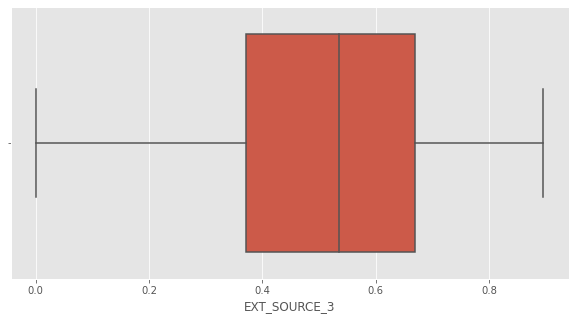

In [177]:
# EXT_SOURCE_2 is a continuous variable. So checking for outliers
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(NewApplications['EXT_SOURCE_3'])
plt.show()

In [178]:
# Since EXT_SOURCE_2 has no outlier, we can choose mean to impute the column
imputVAL = round(NewApplications['EXT_SOURCE_3'].mean(),2)
print(f'Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the coumn i.e. {imputVAL}')

Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the coumn i.e. 0.51


#### 6.3 AMT_REQ_CREDIT_BUREAU_YEAR imputation

In [179]:
NewApplications['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0     113320
1      63404
2      50192
3      33627
4      20713
5      12052
6       6966
7       3869
8       2127
9       1096
11        31
12        30
10        22
13        19
14        10
17         7
15         6
18         4
19         4
16         3
23         1
20         1
21         1
22         1
25         1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [180]:
NewApplications['AMT_REQ_CREDIT_BUREAU_YEAR'].head()

0    1
1    0
2    0
3    0
4    0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int32

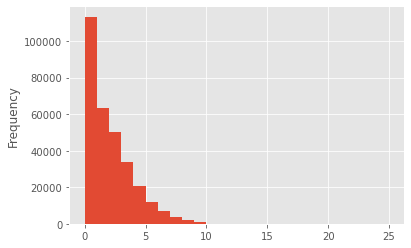

In [181]:
num_unique_values = len(NewApplications['AMT_REQ_CREDIT_BUREAU_YEAR'].unique())
NewApplications['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins=num_unique_values)
plt.show()

In [182]:
NewApplications['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(NewApplications['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace=True)
print("Similar to the column 'AMT_REQ_CREDIT_BUREAU_YEAR', the missing values of columns 'AMT_REQ_CREDIT_BUREAU_MONTH', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT' can be imputed with the mode, which is the value {}. Since they all are number of credit inquiries, replacing missing values with the most frequent value.".format(0))


Similar to the column 'AMT_REQ_CREDIT_BUREAU_YEAR', the missing values of columns 'AMT_REQ_CREDIT_BUREAU_MONTH', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT' can be imputed with the mode, which is the value 0. Since they all are number of credit inquiries, replacing missing values with the most frequent value.


#### 6.4 NAME_TYPE_SUITE imputation

In [183]:
NewApplications['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
nan                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [184]:
NewApplications['NAME_TYPE_SUITE'].head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [185]:
imputVAL = NewApplications['NAME_TYPE_SUITE'].mode()
print(f'Since the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e {imputVAL[0]}') 

Since the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e Unaccompanied


#### 6.5 AMT_GOODS_PRICE imputation

In [186]:
NewApplications['AMT_GOODS_PRICE'].value_counts()

450000.0    26022
225000.0    25280
675000.0    24962
900000.0    15415
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [187]:
NewApplications['AMT_GOODS_PRICE'].head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

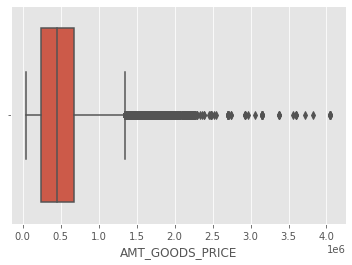

In [188]:
# AMT_GOODS_PRICE is a continuous variable. So checking for outliers
sns.boxplot(NewApplications['AMT_GOODS_PRICE'])
plt.show()

In [189]:
imputVAL = NewApplications['AMT_GOODS_PRICE'].median()
print(f'Since the column AMT_GOODS_PRICE has outliers, we can impute the column using median i.e, {imputVAL}')

Since the column AMT_GOODS_PRICE has outliers, we can impute the column using median i.e, 450000.0


#### 6.6 CNT_FAM_MEMBERS imputation

In [191]:
NewApplications['CNT_FAM_MEMBERS'].value_counts()

2.0     158355
1.0      67847
3.0      52600
4.0      24696
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

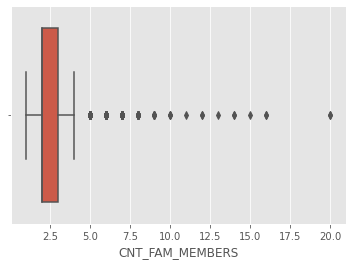

In [192]:
# Since this is count of family members, this is a continuous variable and we can impute the mean/median
sns.boxplot(NewApplications['CNT_FAM_MEMBERS'])
plt.show()

In [193]:
imputVAL = NewApplications['CNT_FAM_MEMBERS'].median()
print(f'Since the column CNT_FAM_MEMBERS has outliers, we can impute the column using median i.e, {imputVAL}')

Since the column CNT_FAM_MEMBERS has outliers, we can impute the column using median i.e, 2.0


### 7. Checking and Modifying the Datatypes

In [194]:
#Checking the float type columns
NewApplications.select_dtypes(include='float').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

In [195]:
#Creating an colum with the list of Float Datatypes and then converting them into Integer Datatype

CategoryToConvert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
NewApplications.loc[:,CategoryToConvert] = NewApplications.loc[:,CategoryToConvert].apply(lambda col: col.astype(int, errors = 'ignore'))

In [196]:
#Checking the object type columns
NewApplications.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [197]:
#Creating an colum with the list of Object Datatypes and then converting them into String Datatype
CategoryToConvert = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE']
NewApplications.loc[:,CategoryToConvert] = NewApplications.loc[:,CategoryToConvert].apply(lambda col: col.astype(str, errors = 'ignore'))

In [198]:
NewApplications.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AGE
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1,High,25
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0,VeryHigh,45
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0,VeryLow,52
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,0,Medium,52
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0,Medium,54
5,100008,0,Cash loans,Male,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1,Low,46
6,100009,0,Cash loans,Female,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0.0,0.0,0.0,1.0,1.0,2,High,37
7,100010,0,Cash loans,Male,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0,VeryHigh,51
8,100011,0,Cash loans,Female,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1,Low,55
9,100012,0,Revolving loans,Male,N,Y,0,135000.0,405000.0,20250.0,...,0,0,NaN,NaN,NaN,NaN,NaN,0,Medium,39


In [200]:
#Imputing the XNA i.e the not available value for the column CODE_GENDER to make it more readable
NewApplications['CODE_GENDER'].value_counts()

Female    202448
Male      105059
Name: CODE_GENDER, dtype: int64

In [201]:
#Dropping the XNA value from CODE_GENDER column as there is only 4 rows having Gender as XNA.
NewApplications = NewApplications[NewApplications['CODE_GENDER'] != 'XNA']
NewApplications['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace = True)

In [202]:
NewApplications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AGE
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1,High,25
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0,VeryHigh,45
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0,VeryLow,52
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,0,Medium,52
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0,Medium,54


### Binning of Continuous Variables for Analysis

In [203]:
# Binning 'AMT_INCOME_TOTAL' based on quantiles
NewApplications['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [206]:
#Creating A new categorical Column 'INCOME_GROUP' based on income total
NewApplications['INCOME_GROUP'] = pd.qcut(NewApplications['AMT_INCOME_TOTAL'],q = [0,0.1,0.3,0.6,0.8,1], labels=['VeryLow','Low','Medium','High','VeryHigh'])
NewApplications['INCOME_GROUP'].head(10)

0        High
1    VeryHigh
2     VeryLow
3      Medium
4      Medium
5         Low
6        High
7    VeryHigh
8         Low
9      Medium
Name: INCOME_GROUP, dtype: category
Categories (5, object): [VeryLow < Low < Medium < High < VeryHigh]

In [207]:
#Binning the DAYS_BIRTH Column
#Applying abs() function to the column to convert the negative values to positive

abs(NewApplications['DAYS_BIRTH'].quantile([0,0.1,0.3,0.6,0.8,1]))

0.0    25229.0
0.1    22181.0
0.3    18885.2
0.6    14416.0
0.8    11694.0
1.0     7489.0
Name: DAYS_BIRTH, dtype: float64

In [210]:
#Creating AGE column with DAYS_BIRTH data
NewApplications['AGE']=abs(NewApplications['DAYS_BIRTH'])//365.25

In [211]:
NewApplications['AGE'].head()

0    25
1    45
2    52
3    52
4    54
Name: AGE, dtype: int64

In [212]:
NewApplications['AGE'].describe()

count    307507.000000
mean         43.405223
std          11.945763
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [214]:
# Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
NewApplications['AGE_GROUP'] = pd.cut(NewApplications['AGE'],bins=np.arange(20,71,5))

In [ ]:
# Adding one more column that will be used for analysis later
NewApplications['CREDIT_INCOME_RATIO']=round((NewApplications['AMT_CREDIT']/NewApplications['AMT_INCOME_TOTAL']))

In [220]:
# Calculating the percentage of social circle who defaulted
NewApplications['SOCIAL_CIRCLE_30_DAYS_DEF_PERC']=NewApplications['DEF_30_CNT_SOCIAL_CIRCLE']/NewApplications['OBS_30_CNT_SOCIAL_CIRCLE']
NewApplications['SOCIAL_CIRCLE_60_DAYS_DEF_PERC']=NewApplications['DEF_60_CNT_SOCIAL_CIRCLE']/NewApplications['OBS_60_CNT_SOCIAL_CIRCLE']

### 8. Checking the Imbalance in Target

In [222]:
NewApplications['TARGET'].value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

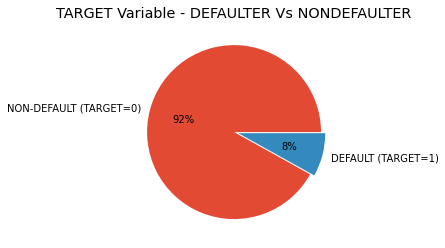

In [227]:
plt.pie(NewApplications['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

> The imbalance is high between Target Variables. More than 92% of people didn't default as opposed to 8% who defaulted.

In [251]:
# Dividing the original dataset into two different datasets depending upon the target value
target0 = NewApplications.loc[NewApplications['TARGET'] == 0]
target1 = NewApplications.loc[NewApplications['TARGET'] == 1]

### 9. Univariate Analysis

In [263]:
def plotuniv(var):
    
    
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=target0,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(target0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=target1,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(target1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

In [269]:
#Columns for the data analysis
NewApplications.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

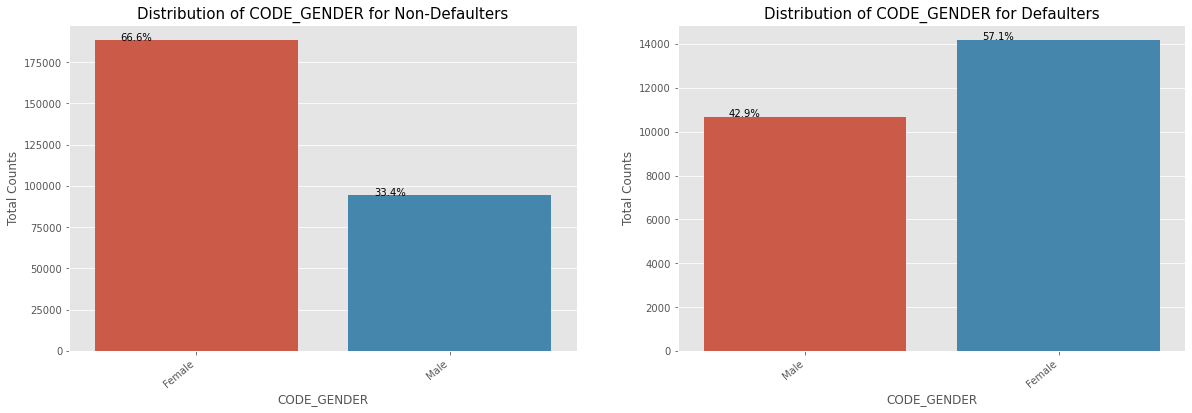

In [265]:
#Gender distribution for Loan Defaulters and Non- Defaulters
plotuniv('CODE_GENDER')

> It can be observed that Female contribute **67%** to the non-defaulters while **57%** to the defaulters.
> <br> We see more female applying for loans than males and hence the more number of female defaulters as well.

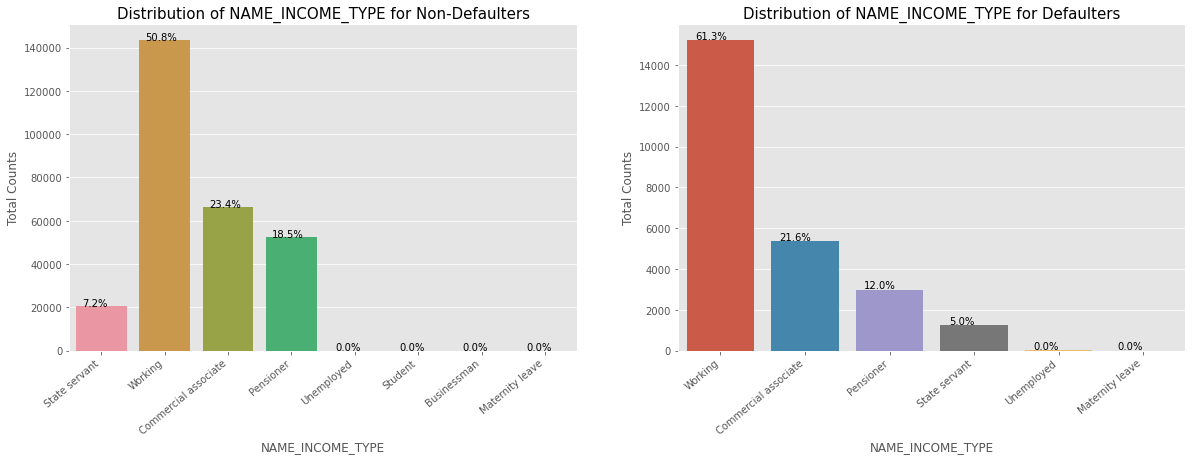

In [266]:
plotuniv('NAME_INCOME_TYPE')

>It can be observed that the working class people are the ones taking maximum loans and they contribute to 51% of Non- Defaulters and 61% of Defaulters.

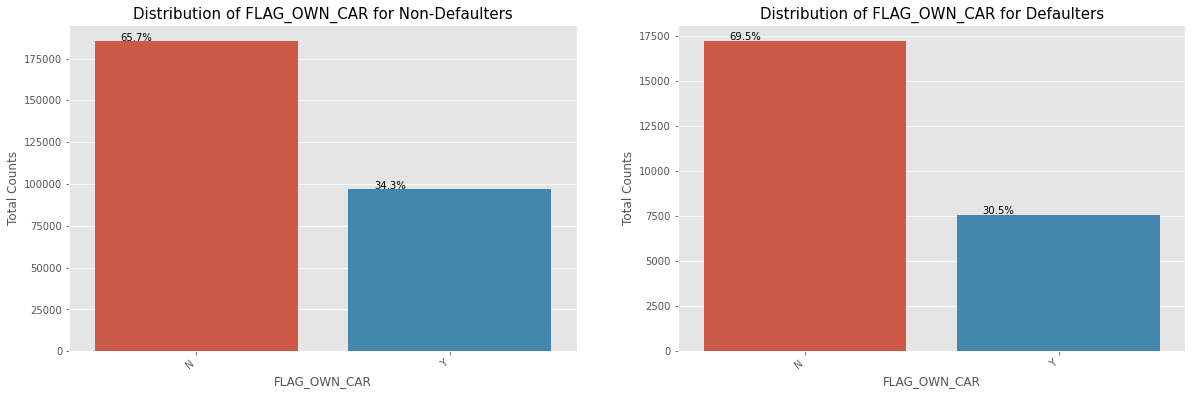

In [267]:
plotuniv('FLAG_OWN_CAR')

> It can be observed that people with cars contribute 65.7% to the non-defaulters while 69.5% to the defaulters. We can conclude that
> <br>While people who have car default more often, the reason could be there are simply more people without cars
> <br>Looking at the percentages in both the charts, we can conclude that the rate of default of people having car is low compared to people who don't.

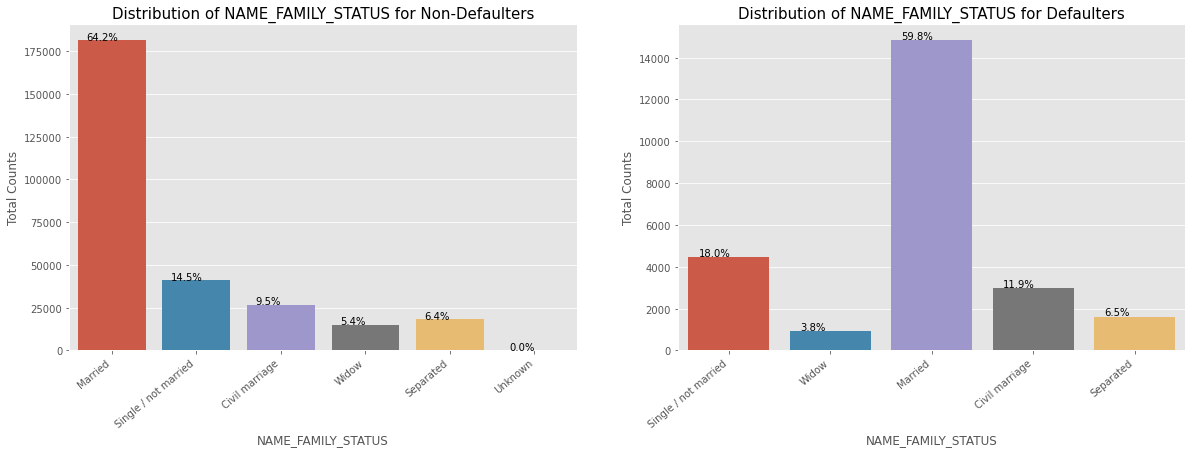

In [272]:
plotuniv('NAME_FAMILY_STATUS')

> Married people tend to apply for more loans compared to others. 
> <br> But from the graph we see that Single/non Married people contribute 14.5% to Non Defaulters and 18% to the defaulters. So there is more risk associated with them.

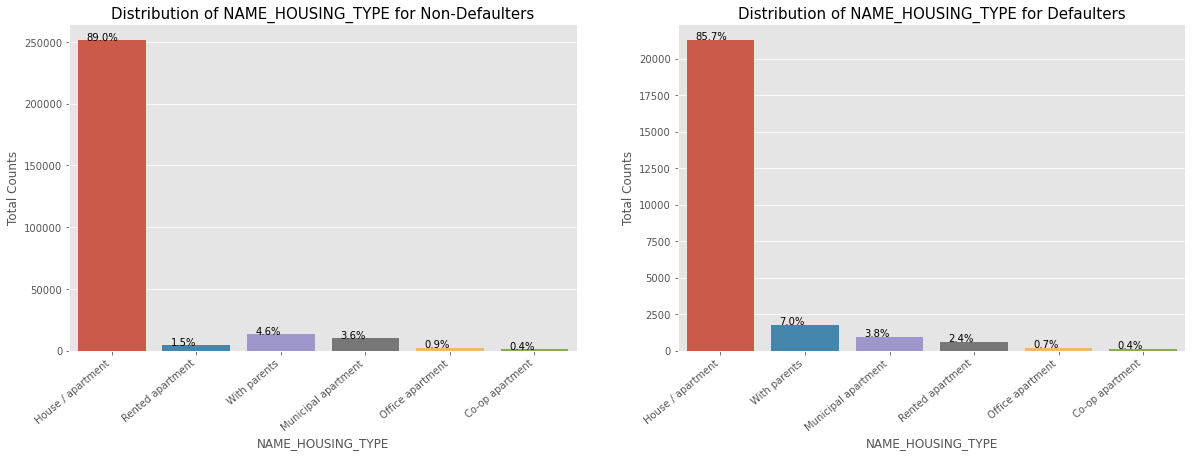

In [273]:
plotuniv('NAME_HOUSING_TYPE')

> It is clear from the graph that people who have House/Appartment, tend to apply for more loans.
> <br>Whereas People living with parents tend to default more often when compared with others.

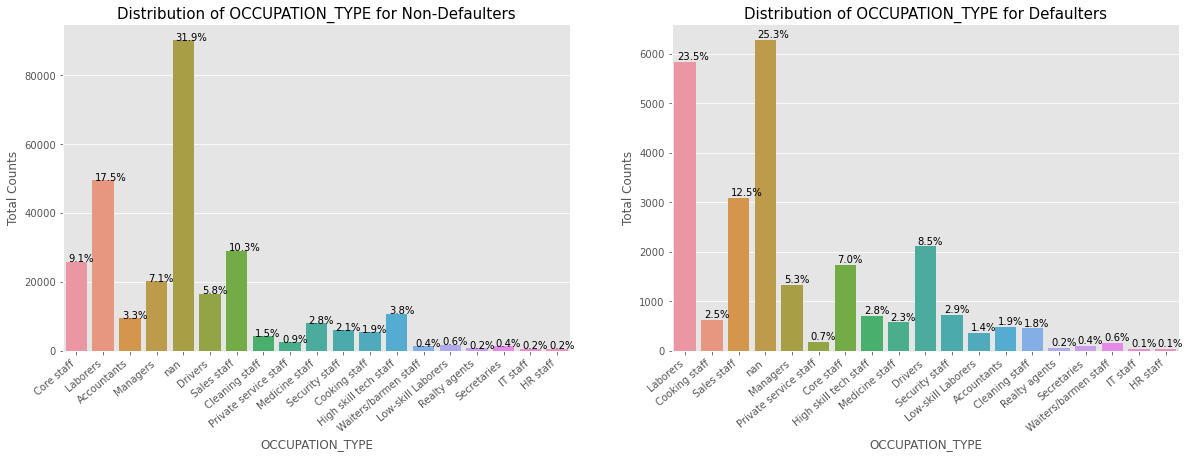

In [274]:
plotuniv('OCCUPATION_TYPE')

#### 9.1 Univariate Analysis on Categorical Data

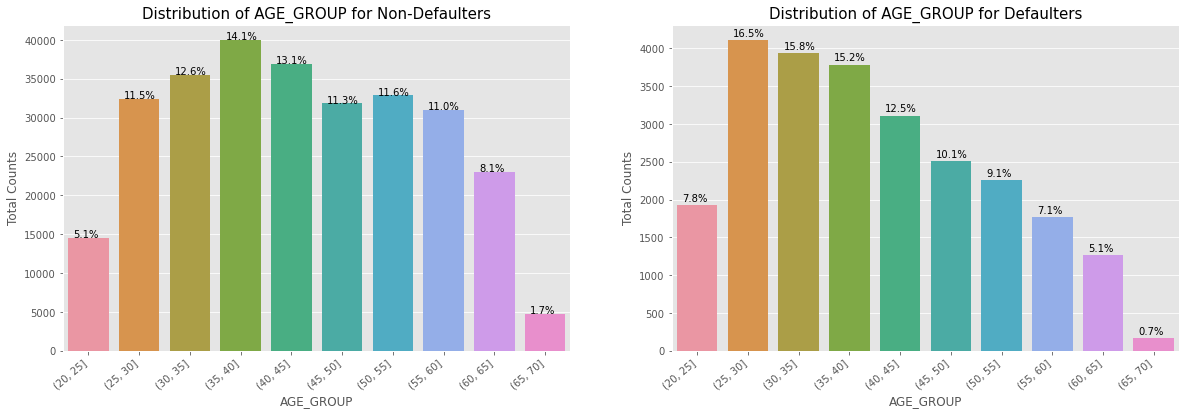

In [276]:
plotuniv('AGE_GROUP')

> We see that (25,30] age group tend to default more often. So they are the riskiest people to loan to.

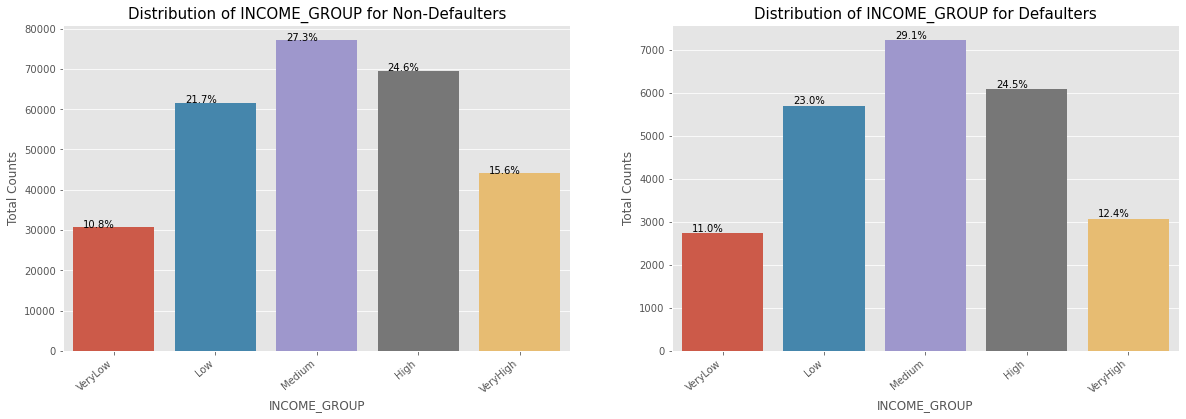

In [277]:
plotuniv('INCOME_GROUP')

> The Medium Income group people tend to take loans more frequently and they contribute the most in the defaulters.

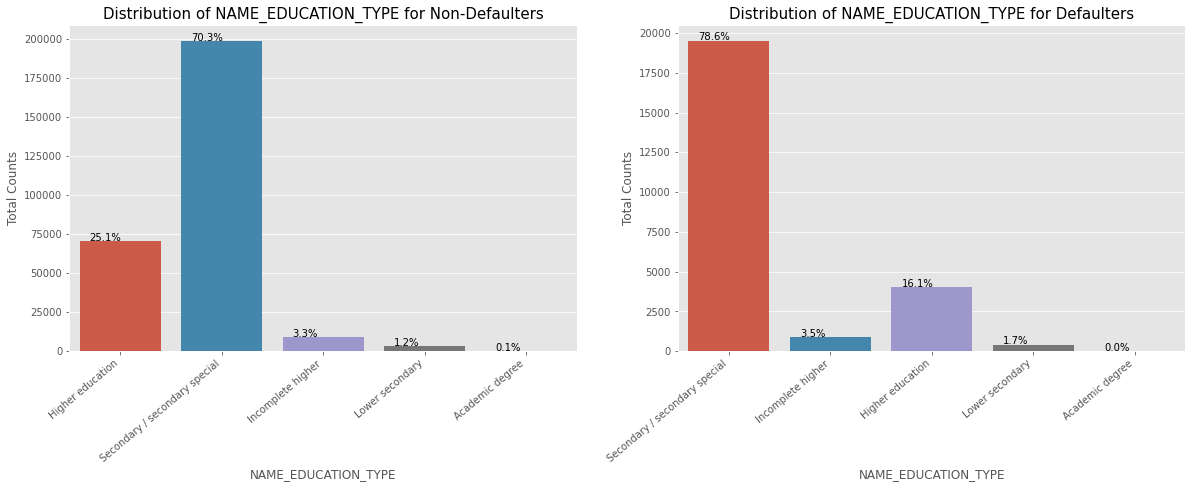

In [278]:
plotuniv('NAME_EDUCATION_TYPE')

> Almost all of the Education categories are equally likely to default except for the higher educated ones who are less likely to default and secondary educated people are more likely to default

#### 9.2 Univariate analysis on Numerical data

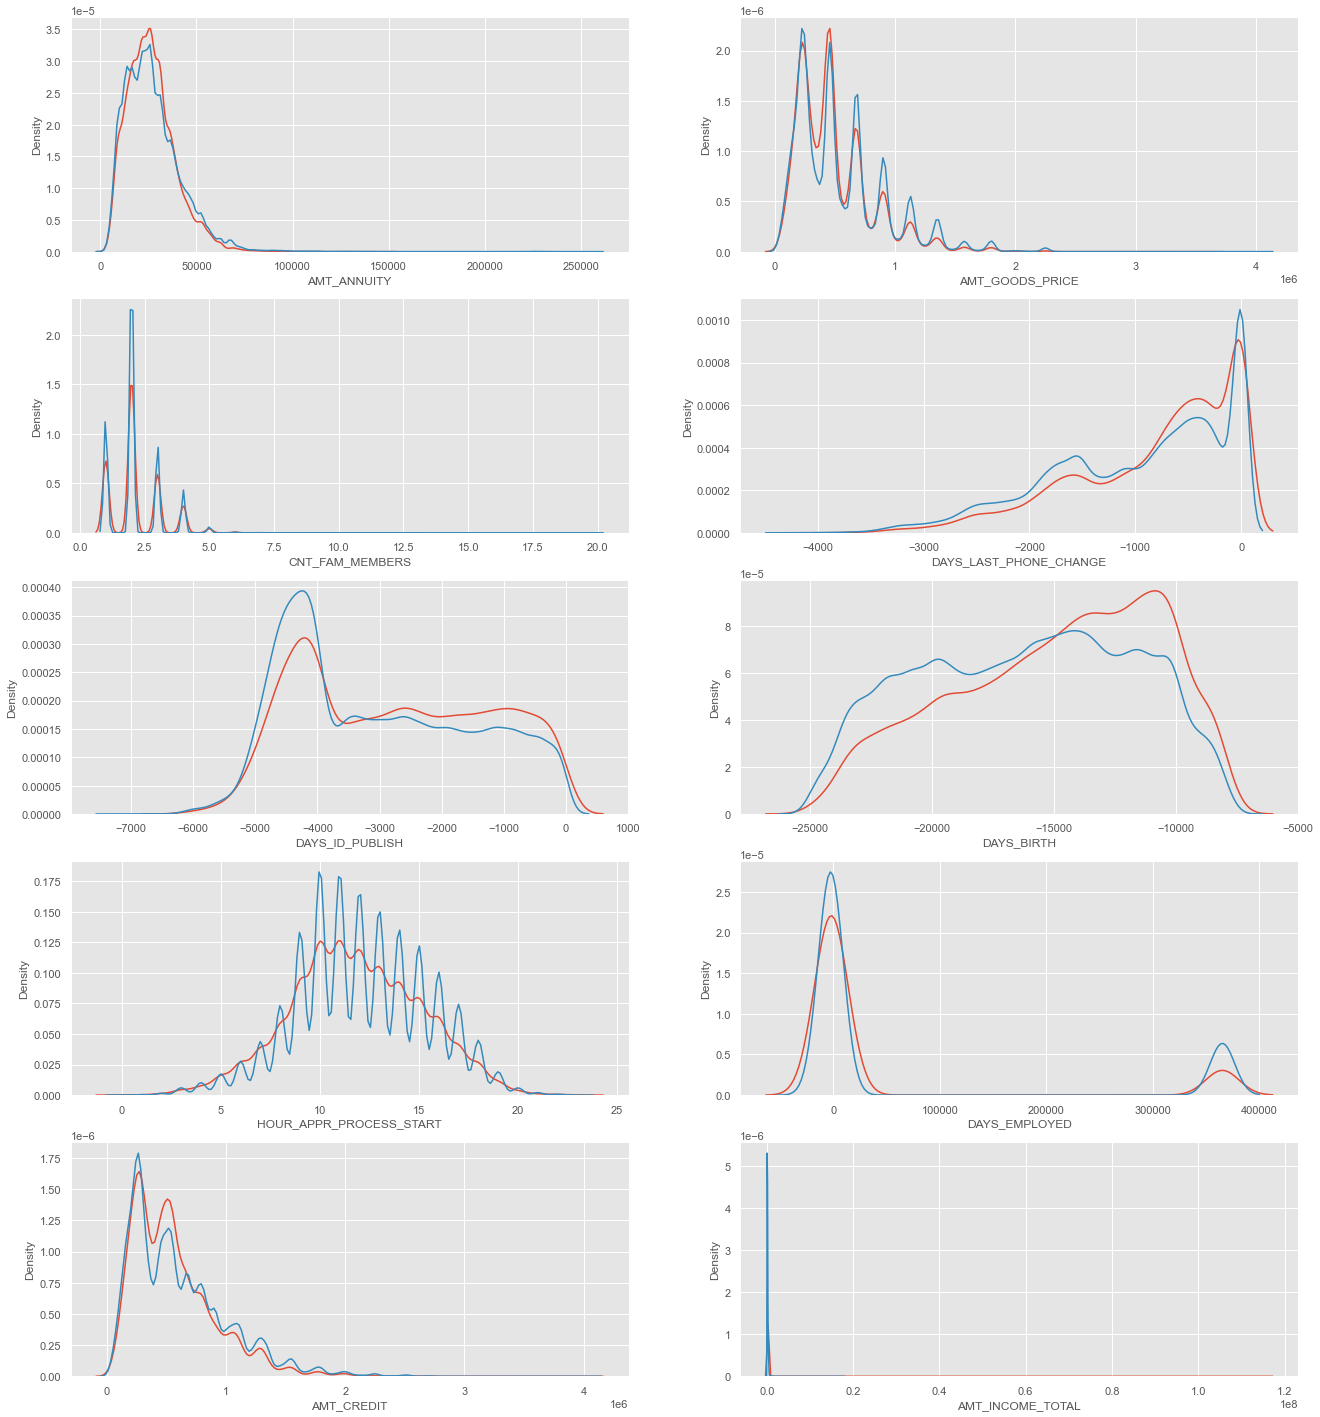

In [347]:
#considering 10 continous numerical columns
continous_columns=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
                  'DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                  'DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(target1[i[1]].dropna(),hist=False,label='Target : default')
    sns.distplot(target0[i[1]].dropna(),hist=False,label='Target : no default')
plt.show()    

**Inferences drawn:**
>Low amount annuity has high number of loans.
<br>People with lower total income are more likely to default.
<br>People who just got employed tends to take more loans.
<br>People who retired tends to take more loans.
<br>High number of applications are filed in 10 AM to 2 PM
<br>Nuclear family tends to take more loans


### 10. Finding the Top 10 Correlations

In [315]:
#Getting the top 10 correlation in target0
corr=target0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
932,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999758,0.999758
4836,AGE,DAYS_BIRTH,-0.999711,0.999711
2806,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998510,0.998510
2516,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997018,0.997018
2444,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.993582,0.993582
2518,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.988152,0.988152
430,AMT_GOODS_PRICE,AMT_CREDIT,0.987253,0.987253
2374,FLOORSMAX_MODE,FLOORSMAX_AVG,0.986569,0.986569
2302,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.971032,0.971032
2446,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.962064,0.962064


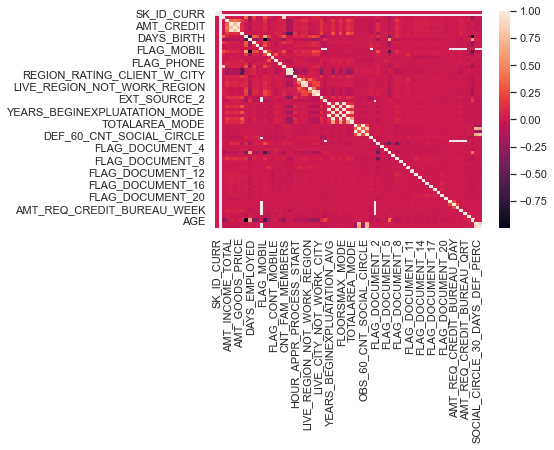

In [317]:
sns.heatmap(target0.corr())

In [316]:
#Getting the top 10 correlation in target1
corr=target1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
932,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999702,0.999702
4836,AGE,DAYS_BIRTH,-0.999691,0.999691
2806,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998270,0.998270
2516,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997187,0.997187
2444,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.996124,0.996124
2518,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.989195,0.989195
2374,FLOORSMAX_MODE,FLOORSMAX_AVG,0.986935,0.986935
430,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
2302,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.980466,0.980466
2446,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.978073,0.978073


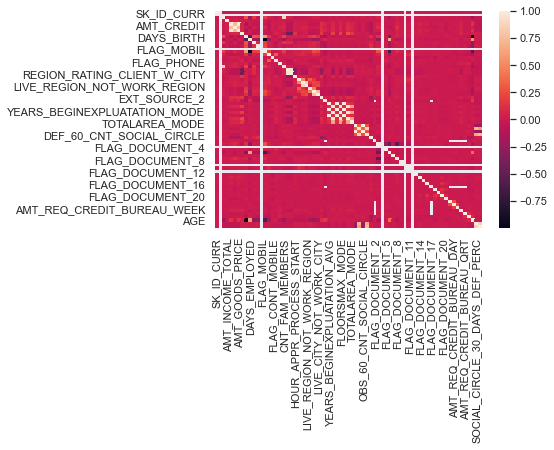

In [318]:
sns.heatmap(target1.corr())

### 11. Bivariate Analysis 

#### 11.1 Bivariate Analysis of Numerical Variables

In [319]:
# function for scatter plot
def plotbiv(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=target0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=target1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

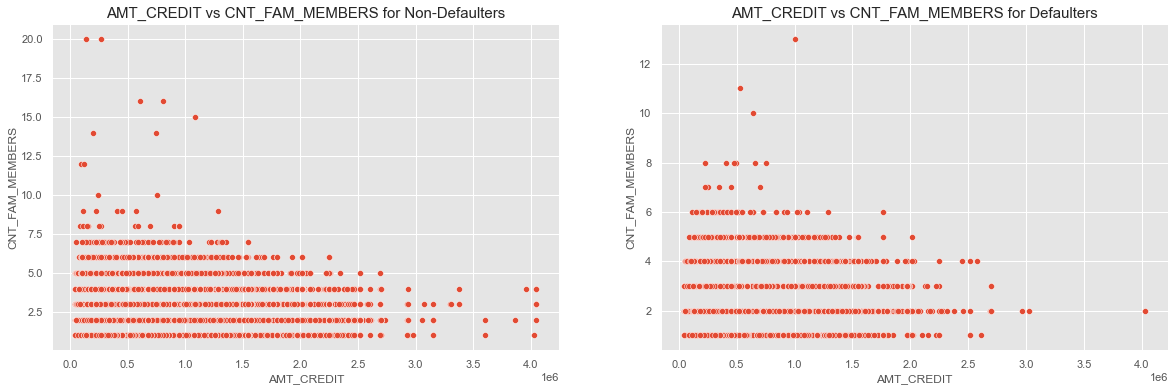

In [321]:
plotbiv('AMT_CREDIT','CNT_FAM_MEMBERS')

> We can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low.
> We can observe that larger families and people with larger AMT_CREDIT are less likely to default.

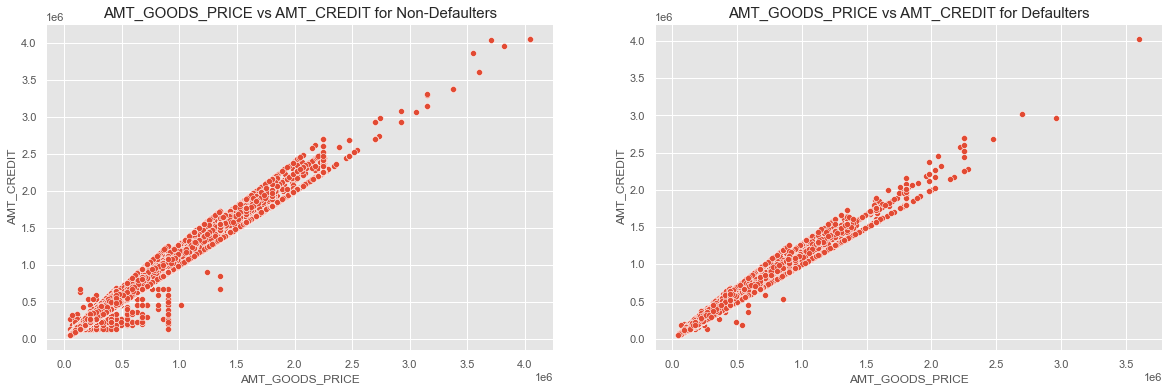

In [322]:
plotbiv('AMT_GOODS_PRICE','AMT_CREDIT')

### 12. Data Analysis For Previous Application Data

In [323]:
PreviousApplications.shape

(1670214, 37)

In [325]:
#Removing the columns with more than 50% of Null Values
PreviousApplications = PreviousApplications.loc[:,PreviousApplications.isnull().mean()<=0.5]


In [326]:
PreviousApplications.shape

(1670214, 33)

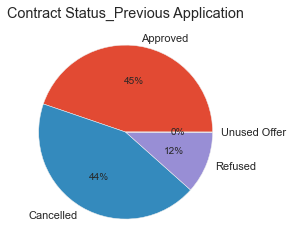

In [340]:
plt.pie(PreviousApplications['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100,labels= ['Approved','Cancelled','Refused','Unused Offer'],autopct='%1.f%%')
plt.title('Contract Status_Previous Application')
plt.show()

In [343]:
# function to count plot for categorical variables
def prevplot(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=PreviousApplications,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

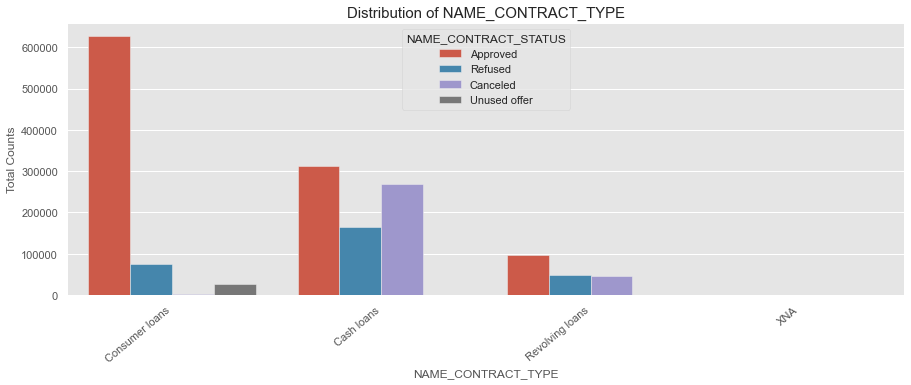

In [344]:
prevplot('NAME_CONTRACT_TYPE')


> We can observe that, most of the applications are for 'Cash loans' and 'Consumer loans' where the cash loans have been refused more often than others.

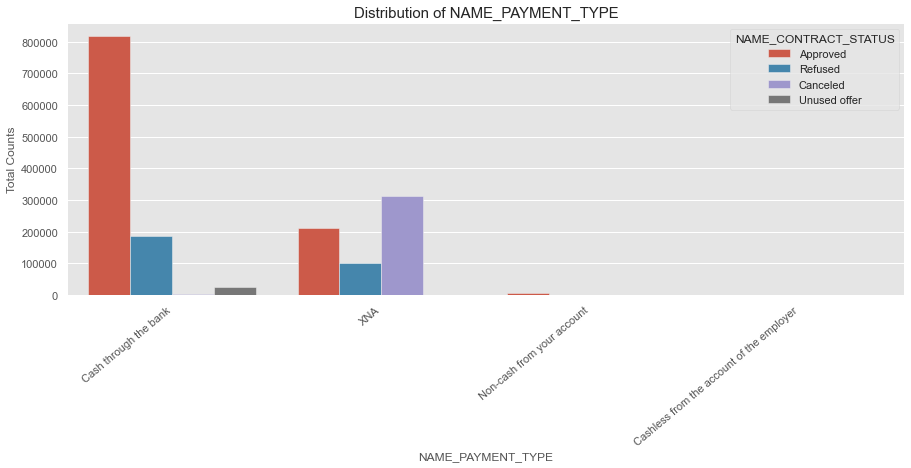

In [345]:
prevplot('NAME_PAYMENT_TYPE')

> We can infer from the above chart that most clients have preferred using 'Cash through the bank' option to repay the loan and the other options like 'Non-cash from your account' and 'Cashless from the account of the employer' is the least used options.

In [348]:
#Getting the top 10 correlation PreviousApplication
corr=PreviousApplications.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
71,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
70,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
53,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
173,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
174,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


<Figure size 1440x576 with 0 Axes>

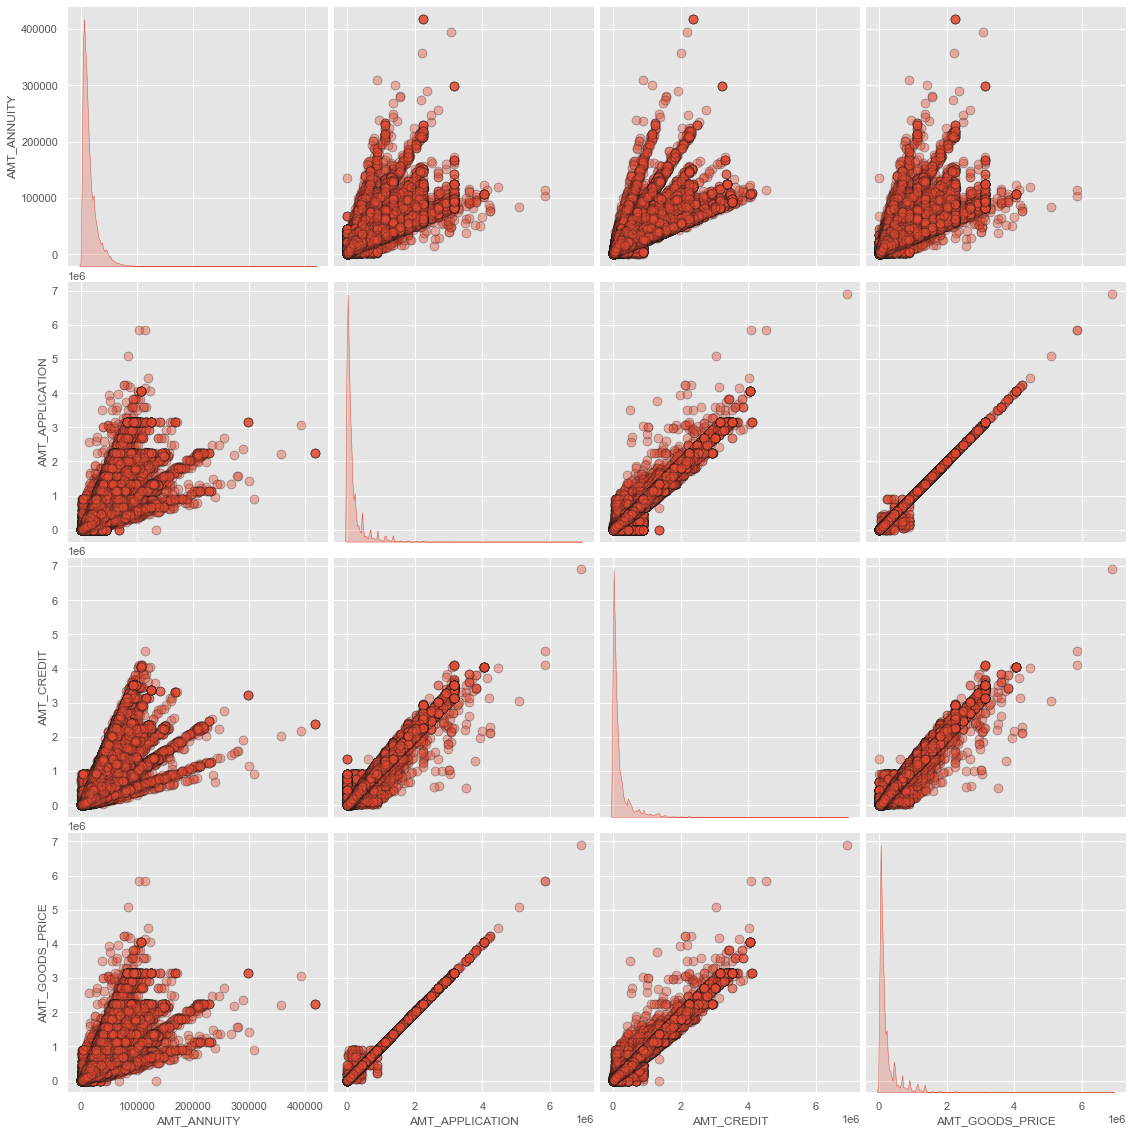

In [353]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(PreviousApplications[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde',plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'}, size = 4)
plt.show()

### 13. Merging the files and analyzing the data

In [355]:
## Merging the two files to do some analysis
merged_df = pd.merge(NewApplications, PreviousApplications, how='left', on=['SK_ID_CURR'], suffixes=('_Current', '_Previous'))
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [356]:
merged_df.shape

(1430100, 118)

In [357]:
merged_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,AMT_GOODS_PRICE_Current,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.430100e+06,1.430100e+06,1.430100e+06,1.430100e+06,1.430100e+06,1.430007e+06,1.428881e+06,1.430100e+06,1.430100e+06,1.430100e+06,...,1.413646e+06,1.413646e+06,1.413646e+06,1.106443e+06,852573.000000,852573.000000,852573.000000,852573.000000,852573.000000,852573.000000
mean,2.784722e+05,8.624572e-02,4.038697e-01,1.736029e+05,5.893453e+05,2.704227e+04,5.294441e+05,2.079059e-02,-1.631513e+04,6.860483e+04,...,9.964319e-01,-8.803712e+02,3.149935e+02,1.605202e+01,342257.063591,13489.117936,33275.707622,76665.920689,82353.604242,0.330566
std,1.028024e+05,2.807266e-01,7.165050e-01,1.983338e+05,3.874256e+05,1.404019e+04,3.557892e+05,1.339814e-02,4.346696e+03,1.451988e+05,...,5.962675e-02,7.835434e+02,7.695231e+03,1.456665e+01,88833.335981,71651.033182,106163.005532,149704.917515,153537.344812,0.470417
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,-2.522900e+04,-1.791200e+04,...,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893620e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.679850e+04,2.385000e+05,1.003200e-02,-1.997500e+04,-2.825000e+03,...,1.000000e+00,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789560e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.491650e+04,4.500000e+05,1.885000e-02,-1.603800e+04,-1.277000e+03,...,1.000000e+00,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675120e+05,0.000000e+00,1.000000e+00,2.115000e+05,8.086500e+05,3.457350e+04,6.795000e+05,2.866300e-02,-1.273000e+04,-2.820000e+02,...,1.000000e+00,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.580255e+05,4.050000e+06,7.250800e-02,-7.489000e+03,3.652430e+05,...,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [365]:
def plotmerged(Var1,Var2):
    
    plt.style.use('ggplot')
    sns.despine
    NewDat = merged_df.pivot_table(values='SK_ID_CURR', 
                      index=Var1,
                      columns=Var2,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Var1} on Loan Approval')
    plt.xlabel(f'{Var1}')
    plt.ylabel(f'{Var2}%')
    plt.show()

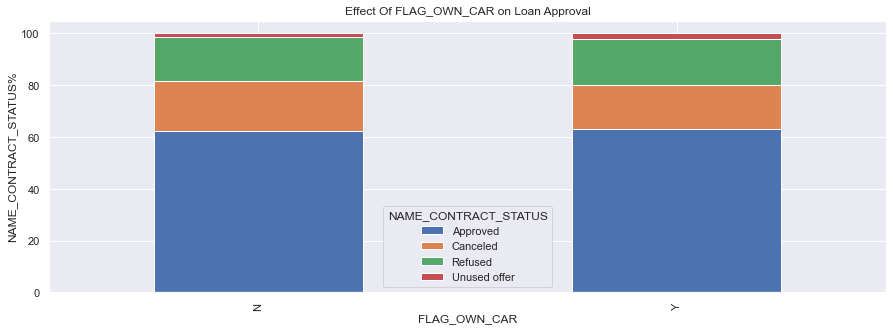

In [366]:
plotmerged('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

> We can infer from the above chart that car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. 

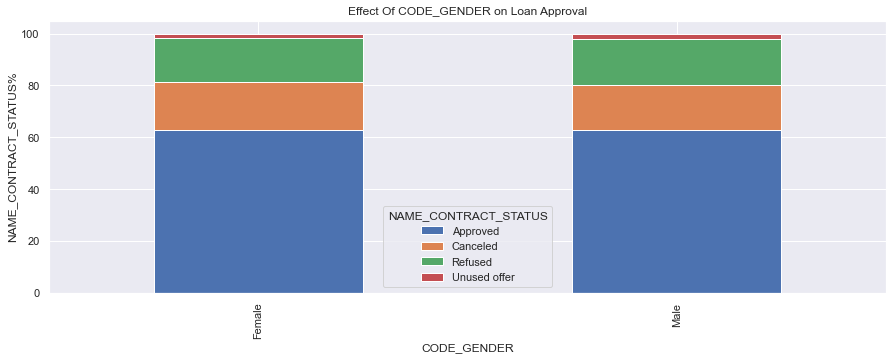

In [367]:
plotmerged('CODE_GENDER','NAME_CONTRACT_STATUS')

> We see that code gender doesn't have any effect on application approval or rejection. 
> <br>But we saw earlier that female have lesser chances of default compared to males. Females have better chances of laon approval than male.

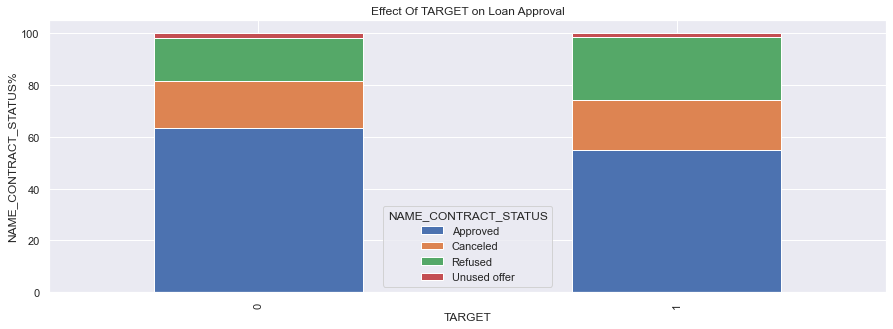

In [368]:
plotmerged('TARGET','NAME_CONTRACT_STATUS')

>We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting. 